# U.S. Medical Insurance Costs

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Functions to use during your analysis:

In [41]:
def calculate_statistics(df, column):
    min_value = df[column].min()
    max_value = df[column].max()
    mean_value = round(df[column].mean(), 3)
    variance = round(df[column].var(), 3)
    std_deviation = round(df[column].std(), 3)

    return ("The statistics for the '{}' column are:\n"
            "Minimum: {}\n"
            "Maximum: {}\n"
            "Mean: {}\n"
            "Variance: {}\n"
            "Standard Deviation: {}").format(column, min_value, max_value, mean_value, variance, std_deviation)
    

In [42]:
us_insurance_df = pd.read_csv(r'insurance.csv') 

display(us_insurance_df.head(-10))

us_insurance_df.info() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1323,42,female,40.370,2,yes,southeast,43896.37630
1324,31,male,25.935,1,no,northwest,4239.89265
1325,61,male,33.535,0,no,northeast,13143.33665
1326,42,female,32.870,0,no,northeast,7050.02130


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Some important notes about this dataset:


* There is no missing data.
* The dataset consists of seven columns, with information about each provided above.
* Some columns are numerical while some are categorical.

##### About the Dataset Columns:

* age: The age of the person who purchased the insurance.
* sex: The gender of the person (male or female).
* bmi: The Body Mass Index, which indicates whether the person is at a healthy weight or not.
* children: The number of children or dependents the person has.
* smoker: Whether the person is a smoker (yes or no).
* region: The region where the person lives in the USA (northeast, northwest, southeast, or southwest).
* charges: The total annual cost charged by the health insurance for this person.

## Descriptive Analysis

### How old are the people in our dataset?

In [43]:

age_statistics = calculate_statistics(us_insurance_df, 'age')
print(age_statistics)

The statistics for the 'age' column are:
Minimum: 18
Maximum: 64
Mean: 39.207
Variance: 197.401
Standard Deviation: 14.05


As we can see, the dataset includes individuals ranging from 18 to 64 years old, representing a wide age spectrum. Now, let's analyze the age distribution by categorizing the data into specific age groups: 18-25 years, 26-35 years, 36-45 years, 46-55 years, and 56-65 years.

age_group
18-25    237
26-35    268
36-45    264
46-55    284
56-65    216
Name: count, dtype: int64


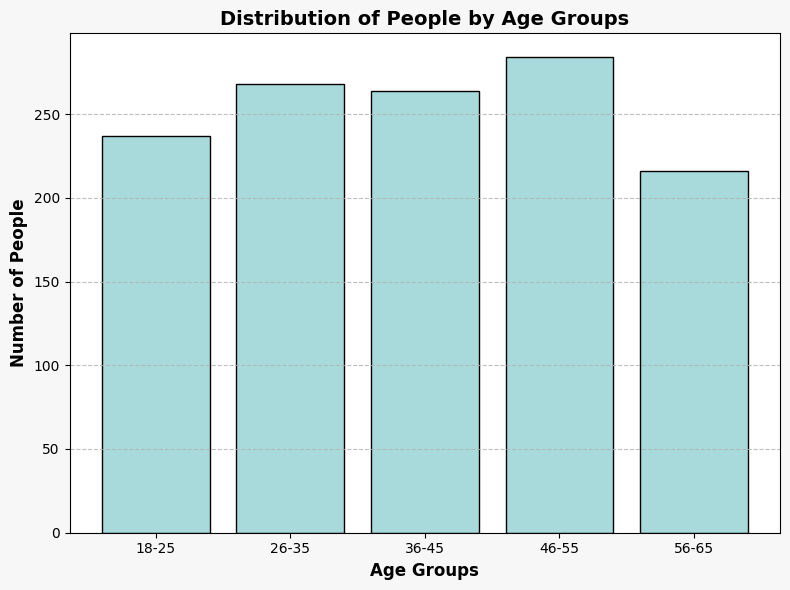

In [44]:
us_insurance_df['age'] = pd.to_numeric(us_insurance_df['age'], errors='coerce')

age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
us_insurance_df['age_group'] = pd.cut(us_insurance_df['age'], bins=age_bins, labels=age_labels, right=True)

age_group_counts = us_insurance_df['age_group'].value_counts(sort=False)
print(age_group_counts)

age_group_labels = age_group_counts.index.astype(str)

plt.figure(figsize=(8, 6))
plt.bar(age_group_labels, age_group_counts.values, color='#a8dadc', edgecolor='black')
plt.title('Distribution of People by Age Groups', fontsize=14, fontweight='bold')
plt.xlabel('Age Groups', fontsize=12, fontweight='bold')
plt.ylabel('Number of People', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().patch.set_facecolor('white')
plt.gcf().set_facecolor('#f7f7f7') 
plt.tight_layout()
plt.show()


As shown in the graph, the largest group is individuals aged 46 to 55 years, but this is not particularly significant, as the differences between this group and the others are minimal. This suggests that our dataset has a well-distributed age range, providing a comprehensive representation across various age groups.

### How is the BMI distribution?

In [45]:
bmi_statistics = calculate_statistics(us_insurance_df, 'bmi')

print(bmi_statistics)

The statistics for the 'bmi' column are:
Minimum: 15.96
Maximum: 53.13
Mean: 30.663
Variance: 37.188
Standard Deviation: 6.098


Considering the BMI categories:

* Less than 18.5: Underweight
* 18.5 to less than 25: Healthy Weight
* 25 to less than 30: Overweight
* 30 or greater: Obesity

Our dataset includes individuals across the entire BMI spectrum, ranging from those classified as underweight to those with severe obesity (grade 3 obesity). These BMI classifications are based on standards developed by the World Health Organization (WHO, Geneva, Switzerland) and the National Heart, Lung, and Blood Institute (NHLBI, Bethesda, Maryland).

It is important to note, however, that BMI is not a comprehensive measure of an individual's health. While it provides a useful framework for understanding weight categories, it does not capture the full complexity of a person's health.

With that in mind, consider the mean BMI value, which suggests that a substantial portion of individuals in our dataset are classified as overweight. To go deeper into this observation, we’ve visualized the BMI distribution using the histogram below. The distribution looks like a Gaussian curve, with the mean slightly skewed to the left.

Considering now the variation and the standard deviation, the variance of 37.188 and the standard deviation of 6.098 indicate that while the mean BMI suggests a general trend, there is still considerable variation in the BMI values across the dataset. This variation is reflected in the spread of the distribution, where the data points deviate from the mean by an average of approximately 6.1 units. Thus, while many individuals have a BMI near the mean, others are spread across the spectrum, showing a diverse range of BMI values.

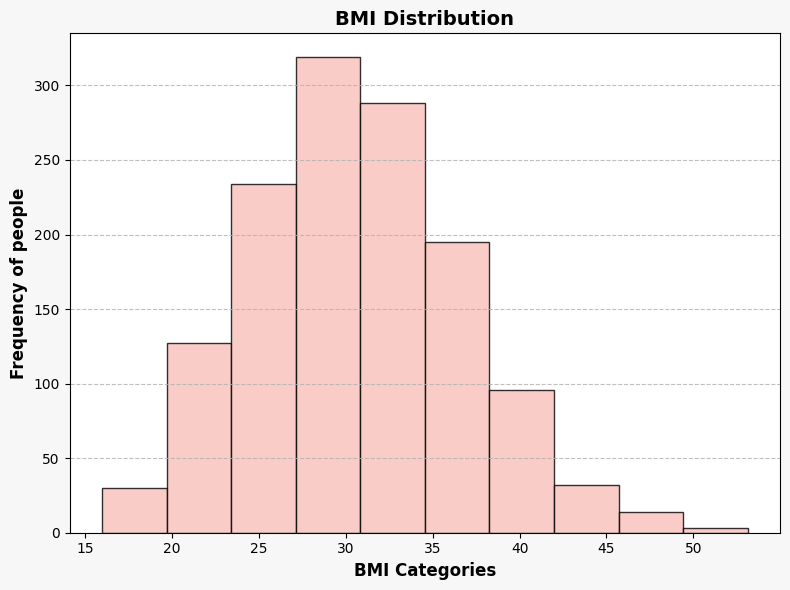

In [46]:
plt.figure(figsize=(8, 6))
plt.hist(us_insurance_df['bmi'], bins=10, color='#f9c0bb', edgecolor='black', alpha=0.8)
plt.title('BMI Distribution', fontsize=14, fontweight='bold')
plt.xlabel('BMI Categories', fontsize=12, fontweight='bold')
plt.ylabel('Frequency of people', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.gca().patch.set_facecolor('white')
plt.gcf().set_facecolor('#f7f7f7')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()


### Are we dealing with big families?

In [47]:
kids_statistics = calculate_statistics(us_insurance_df, 'children')
print(kids_statistics)

The statistics for the 'children' column are:
Minimum: 0
Maximum: 5
Mean: 1.095
Variance: 1.453
Standard Deviation: 1.205


From the statistical analysis, we can conclude that we are not dealing with large families with more than five children. On average, each individual has just over one child. The variance of 1.453 suggests there is notable variation in the number of children among individuals. Additionally, the standard deviation of 1.205 indicates that most people have between zero and two children.

Now, let's see how this distribution looks like in graph.



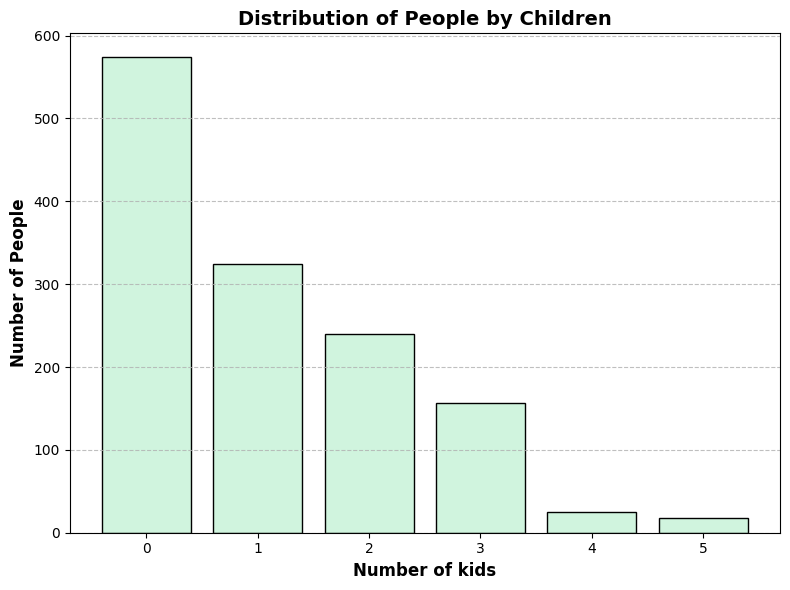

In [48]:
kids_label = [0, 1, 2, 3, 4, 5]
kids_group_counts = us_insurance_df['children'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(kids_label, kids_group_counts.values, color='#d0f4de', edgecolor='black')
plt.title('Distribution of People by Children', fontsize=14, fontweight='bold')
plt.xlabel('Number of kids', fontsize=12, fontweight='bold')
plt.ylabel('Number of People', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().patch.set_facecolor('white')
plt.tight_layout()
plt.show()

### How is the sex distribution represented in our dataset?


sex
male      676
female    662
Name: count, dtype: int64


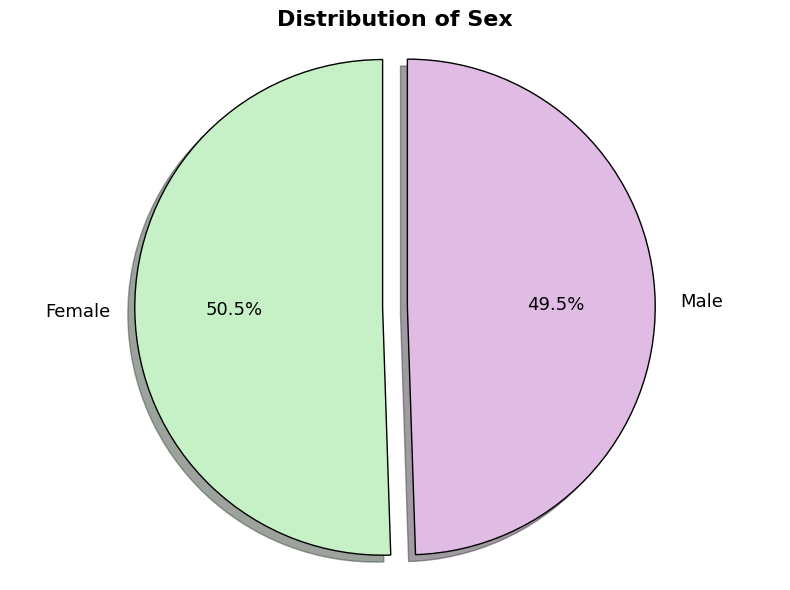

In [49]:
sex_counts = us_insurance_df['sex'].value_counts()
print(sex_counts)

plt.figure(figsize=(8, 6))
sex_labels = ['Female', 'Male']

plt.pie(sex_counts.values, labels=sex_labels, autopct='%1.1f%%', 
        colors=['#C6F1C6', '#E0BBE4'], startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.0}, shadow=True, explode = (0.1, 0), textprops={'fontsize': 13})
plt.title('Distribution of Sex', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

### What is the proportion of smokers in the dataset?

As shown in the pie chart below, the majority of the data represents non-smokers.


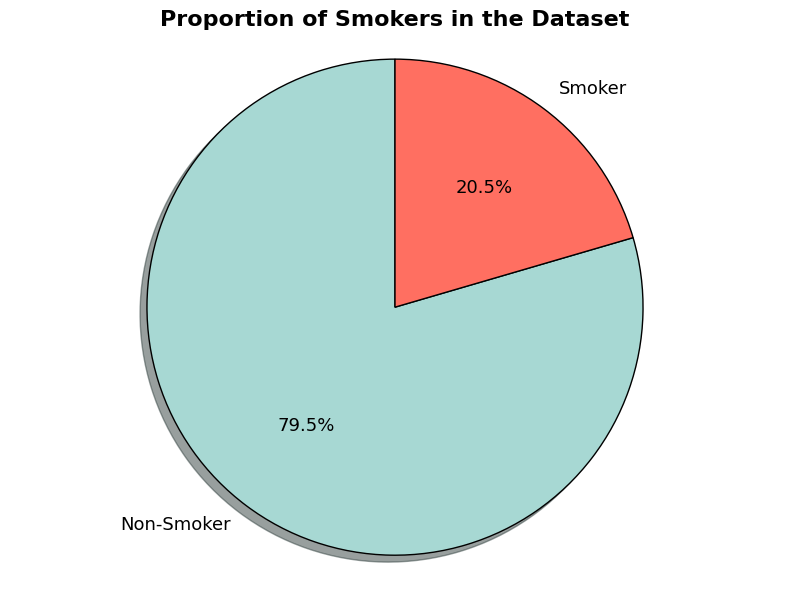

In [50]:
smoker_counts = us_insurance_df['smoker'].value_counts()
smoker_labels = ['Non-Smoker', 'Smoker']

plt.figure(figsize=(8, 6))
plt.pie(smoker_counts, labels=smoker_labels, autopct='%1.1f%%', 
        colors=['#A7D8D3', '#FF6F61'], startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.0}, shadow=True, textprops={'fontsize': 13})
plt.title('Proportion of Smokers in the Dataset', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

Now, what if we ask ourselves: Is there a significant gender disparity in the proportion of smokers within the dataset?

Let’s explore the answer in the graph below.

smoker   no  yes
sex             
female  547  115
male    517  159


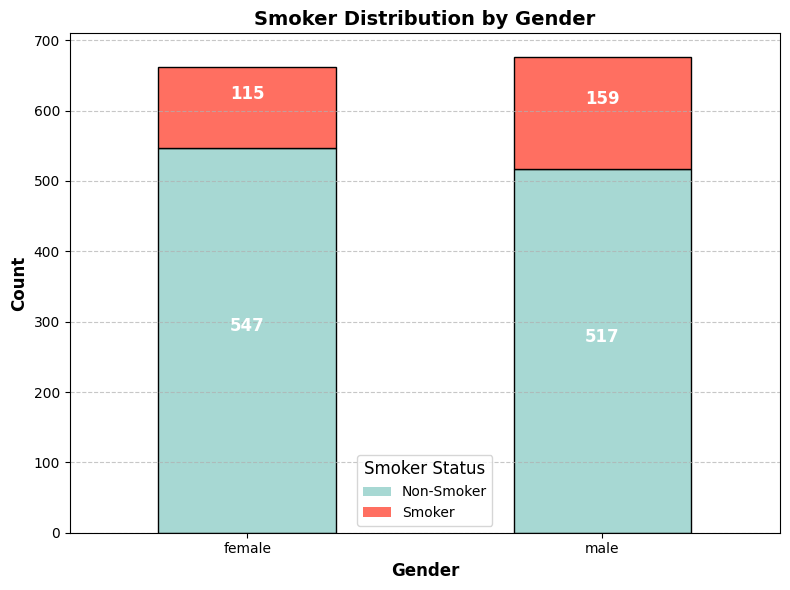

In [51]:
gender_smoker_counts = us_insurance_df.groupby(['sex', 'smoker']).size().unstack()
print(gender_smoker_counts)

graph = gender_smoker_counts.plot(kind='bar', stacked=True, color=['#A7D8D3', '#FF6F61'], figsize=(8, 6))
for container in graph.containers:
    graph.bar_label(container, label_type='center', fontsize=12, fontweight='bold', color='white', padding=10)

plt.title('Smoker Distribution by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Non-Smoker', 'Smoker'], fontsize=10, title='Smoker Status', title_fontsize=12)
plt.gca().patch.set_facecolor('white')
for patch in graph.patches:
    patch.set_edgecolor('black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


As shown in the table, there are more male smokers than female smokers, but the difference is relatively small. This suggests that the dataset provides a balanced representation of both non-smokers and smokers, regardless of gender. This indicates that the data captures the smoking habits of both male and female individuals fairly well.

### How is the region distribuition of our data?

Here, we are considering the regions of the compass rose, excluding the North and South, as shown in the graph. Additionally, the regions represented are well-balanced in terms of the number of individuals in each region.

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


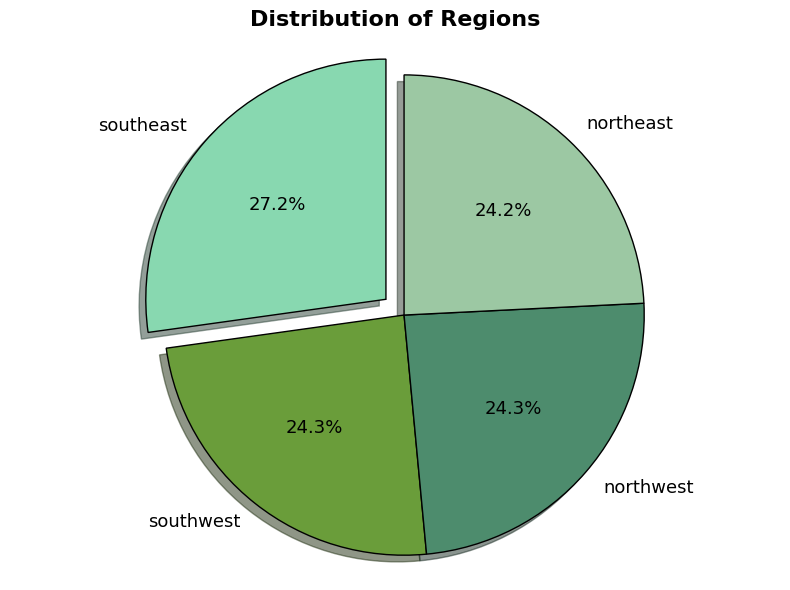

In [52]:
region_counts = us_insurance_df['region'].value_counts()
print(region_counts)

plt.figure(figsize=(8, 6))
region_labels = ['southeast', 'southwest', 'northwest', 'northeast']

plt.pie(region_counts.values, labels=region_labels, autopct='%1.1f%%', 
        colors=['#88D8B0', '#6A9D3A', '#4D8C6D', '#9CC8A3'], startangle=90, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.0}, shadow=True, explode = (0.1, 0, 0, 0), textprops={'fontsize': 13})
plt.title('Distribution of Regions', fontsize=16, fontweight='bold')
plt.axis('equal')

plt.tight_layout()
plt.show()

##### In summary...

Our dataset encompasses a variety of age groups and BMI categories, with a significant proportion of individuals falling within the obesity range. The data does not reflect large families, with most individuals having slightly more than one child on average.

The gender distribution is well-represented, considering only male and female categories, with around 20% of both males and females identified as smokers. Finally, the individuals in our study are spread across the United States, although it's important to note that the dataset does not include representation from the northern and southern regions.

## Exploratory Analysis

What about the charges?

Having gained a clear understanding of the dataset and its representation of a specific population, we can now explore certain aspects of the annual costs individuals incur for their medical insurance. Let’s dive into the questions and discussions that follow.

In [53]:
charge_statistics = calculate_statistics(us_insurance_df, 'charges')
print(charge_statistics)


The statistics for the 'charges' column are:
Minimum: 1121.8739
Maximum: 63770.42801
Mean: 13270.422
Variance: 146652372.153
Standard Deviation: 12110.011


#### Who pay the highest and lowest charges?

In [54]:
max_charge = us_insurance_df[us_insurance_df['charges'] == us_insurance_df['charges'].max()]
min_charge = us_insurance_df[us_insurance_df['charges'] == us_insurance_df['charges'].min()]
display(max_charge)
display(min_charge)


,age,sex,bmi,children,smoker,region,charges,age_group
543,54,female,47.41,0,yes,southeast,63770.42801,46-55


,age,sex,bmi,children,smoker,region,charges,age_group
940,18,male,23.21,0,no,southeast,1121.8739,NaN


#### What about the average and the median values of the charges?

In [55]:
average_cost = us_insurance_df['charges'].mean()
median_cost = us_insurance_df['charges'].median()
print(f"Average Annual Cost: {average_cost:.2f}")
print(f"Median Annual Cost: {median_cost:.2f}")

Average Annual Cost: 13270.42
Median Annual Cost: 9382.03


The average annual cost is higher than the median, suggesting that there are some higher values influencing the average. 

#### Now, how the mean charges vary across the age groups we defined earlier?

C:\Users\miria\AppData\Local\Temp\ipykernel_20352\2489642258.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_mean_charges = us_insurance_df.groupby('age_group')['charges'].mean()


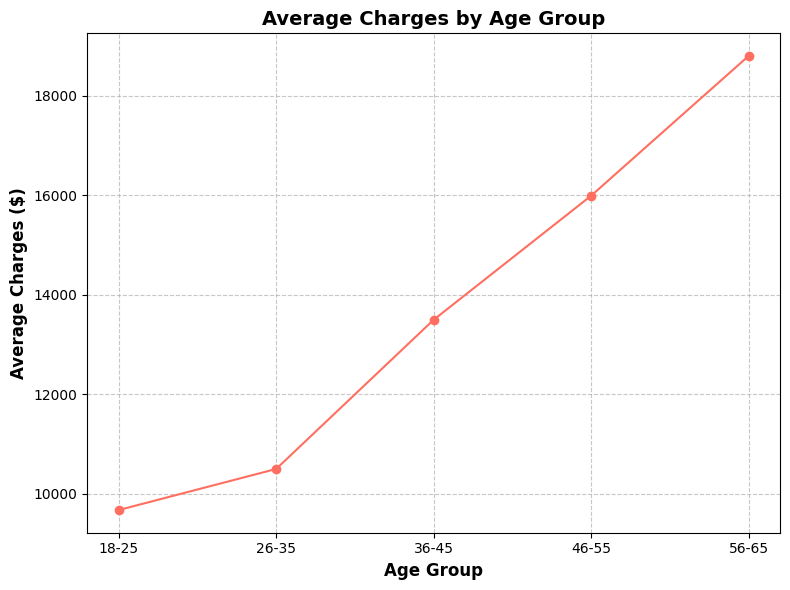

In [56]:
age_group_mean_charges = us_insurance_df.groupby('age_group')['charges'].mean()

plt.figure(figsize=(8, 6))
plt.plot(age_group_mean_charges.index.astype(str), age_group_mean_charges.values, marker='o', color='#FF6F61')
plt.title('Average Charges by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12, fontweight='bold')
plt.ylabel('Average Charges ($)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


The linear graph of Average Charges by Age Group reveals an almost linear progression, with a notable increase in the average charges as individuals gets older.

#### How the average of charges vary based only on BMI, considering the classifications we used earlier?

C:\Users\miria\AppData\Local\Temp\ipykernel_20352\4212266277.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_category_mean_charges = us_insurance_df.groupby('bmi_category')['charges'].mean()


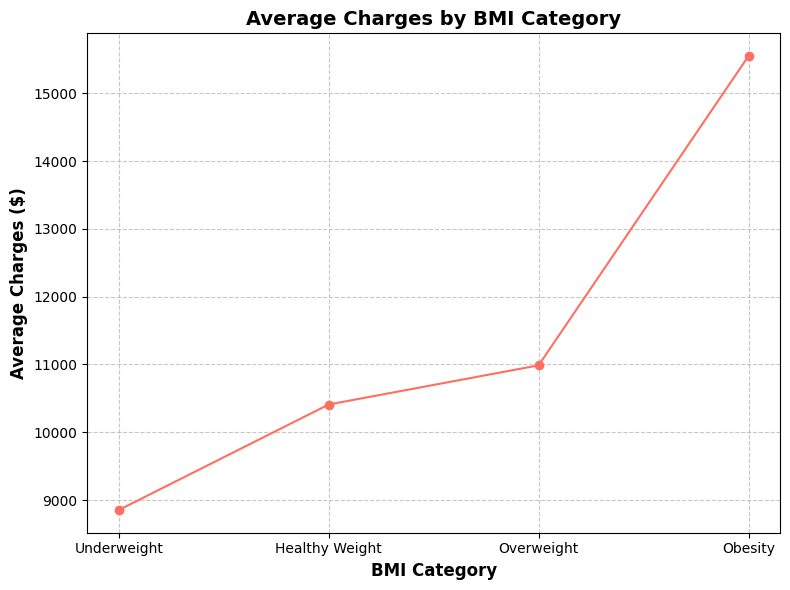

In [57]:
bmi_bins = [0, 18.5, 25, 30, float('inf')]
bmi_labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']
us_insurance_df['bmi_category'] = pd.cut(us_insurance_df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

bmi_category_mean_charges = us_insurance_df.groupby('bmi_category')['charges'].mean()

plt.figure(figsize=(8, 6))
plt.plot(bmi_category_mean_charges.index.astype(str), bmi_category_mean_charges.values, marker='o', color='#FF6F61')
plt.title('Average Charges by BMI Category', fontsize=14, fontweight='bold')
plt.xlabel('BMI Category', fontsize=12, fontweight='bold')
plt.ylabel('Average Charges ($)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Something interesting happens when we analyze the graph above qualitatively, considering the slope (coefficient of angularity or derivative). Even though people who are underweight tend to pay less, which is surprising since being underweight is also harmful to our health, the rate of change is significant. Notice that the slope becomes smaller between "Healthy Weight" and "Overweight," indicating a lower rate of change in charges. However, the rate of change increases dramatically between "Overweight" and "Obesity". 

#### Does the number of kids make a difference in the medical costs of the parents?

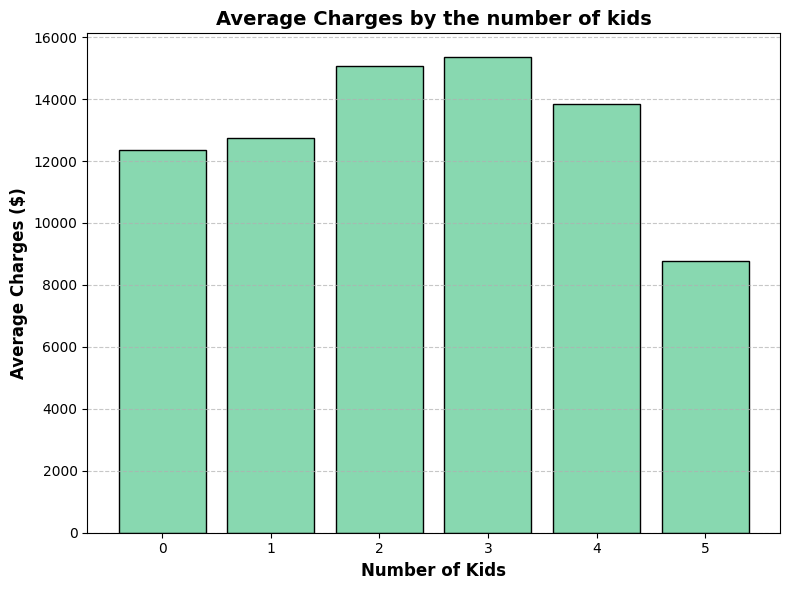

In [58]:
kids_mean_charges = us_insurance_df.groupby('children')['charges'].mean()

plt.figure(figsize=(8, 6))
plt.bar(kids_mean_charges.index, kids_mean_charges.values, color='#88D8B0', edgecolor='black')
plt.title('Average Charges by the number of kids', fontsize=14, fontweight='bold')
plt.xlabel('Number of Kids', fontsize=12, fontweight='bold')
plt.ylabel('Average Charges ($)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### What about the smokers?

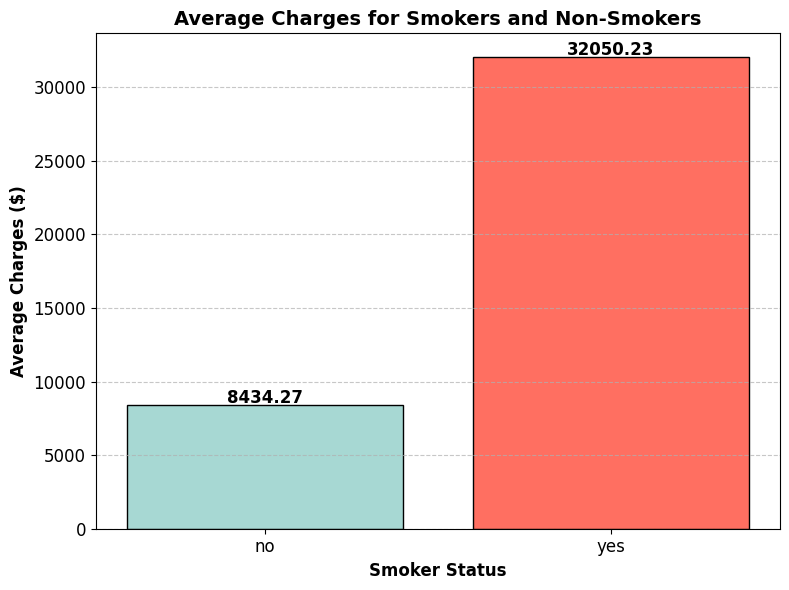

In [59]:
smoker_mean_charges = us_insurance_df.groupby('smoker')['charges'].mean()

plt.figure(figsize=(8, 6))
plt.bar(smoker_mean_charges.index, smoker_mean_charges.values, color=['#A7D8D3','#FF6F61'], edgecolor='black')
plt.title('Average Charges for Smokers and Non-Smokers', fontsize=14, fontweight='bold')
plt.xlabel('Smoker Status', fontsize=12, fontweight='bold')
plt.ylabel('Average Charges ($)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(smoker_mean_charges.values):
    plt.text(i, v + 100, f'{v:.2f}', ha='center', fontsize=12, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


The answer is clear: smoking has a significant impact on healthcare costs. It's evident that smoking is a harmful habit that directly affects our health, leading to higher medical expenses.

#### Now, who pays more, males or females?


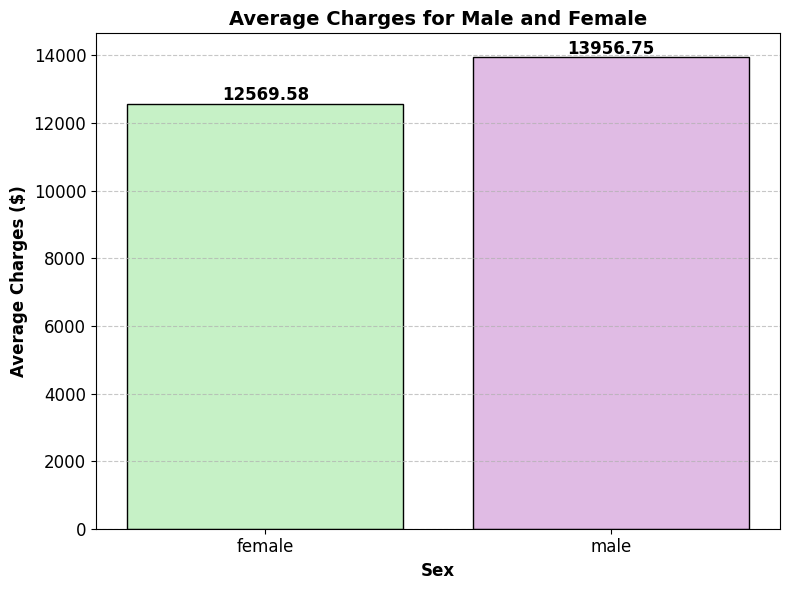

In [60]:
sex_mean_charges = us_insurance_df.groupby('sex')['charges'].mean()

plt.figure(figsize=(8, 6))
plt.bar(sex_mean_charges.index, sex_mean_charges.values, color=['#C6F1C6', '#E0BBE4'], edgecolor='black')
plt.title('Average Charges for Male and Female', fontsize=14, fontweight='bold')
plt.xlabel('Sex', fontsize=12, fontweight='bold')
plt.ylabel('Average Charges ($)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(sex_mean_charges.values):
    plt.text(i, v + 100, f'{v:.2f}', ha='center', fontsize=12, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


There's only a small difference between the two averages, probably because there are more male smokers than female smokers. But the difference doesn't seem to be just because of gender.

This makes sense, considering that 20.5% of people in our dataset are smokers, and more than 58% of them are male (159 out of 274 smokers). But it can be also another facter as the BMI. Considering that we have another question arraising that helps us to understand why male pays more than female:

#### What are the differences in BMI distribution between males and females?

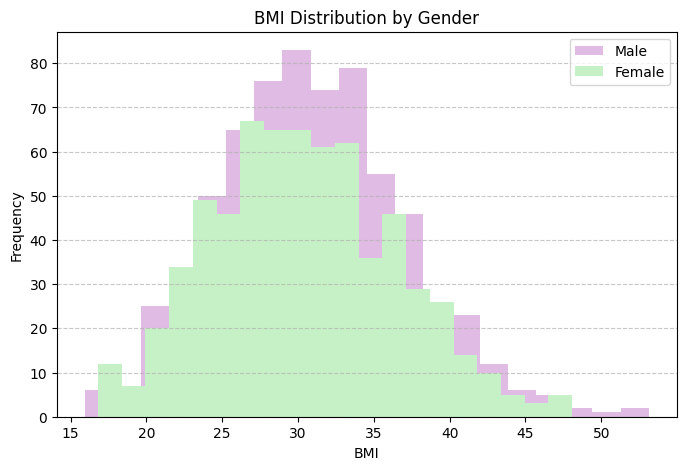

In [61]:
# Separar os dados por gênero
bmi_male = us_insurance_df[us_insurance_df['sex'] == 'male']['bmi']
bmi_female = us_insurance_df[us_insurance_df['sex'] == 'female']['bmi']

# Visualizar distribuições com histogramas
plt.figure(figsize=(8, 5))
plt.hist(bmi_male, bins=20, alpha=1.0, label='Male', color='#E0BBE4')
plt.hist(bmi_female, bins=20, alpha=1.0, label='Female', color='#C6F1C6')
plt.title('BMI Distribution by Gender')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Male individuals are more frequently categorized as overweight, which can potentially influence their annual insurance costs.

#### How are insurance costs distributed across different regions?

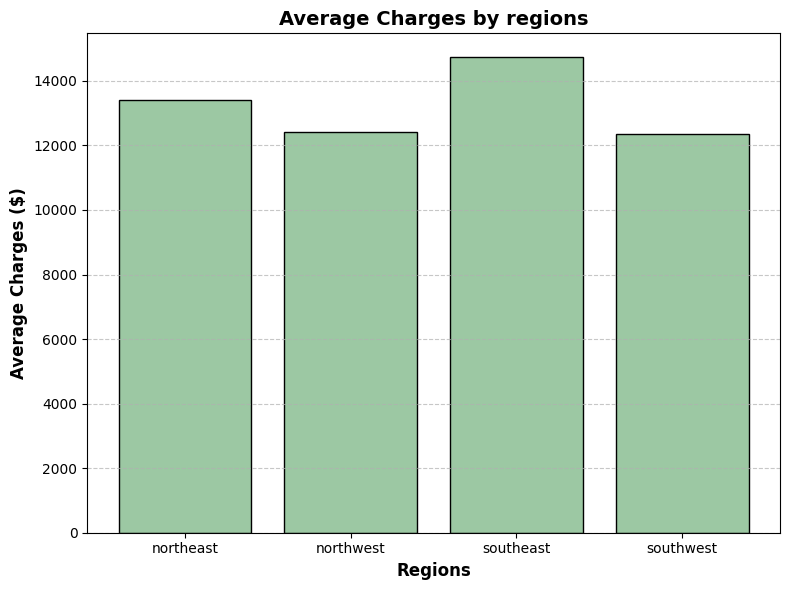

In [62]:
region_mean_charges = us_insurance_df.groupby('region')['charges'].mean()

plt.figure(figsize=(8, 6))
plt.bar(region_mean_charges.index, region_mean_charges.values, color='#9CC8A3', edgecolor='black')
plt.title('Average Charges by regions', fontsize=14, fontweight='bold')
plt.xlabel('Regions', fontsize=12, fontweight='bold')
plt.ylabel('Average Charges ($)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Yes, if you live in the southeastern region, you may pay slightly higher medical insurance premiums. However, the difference is not substantial enough to be considered a major factor.



So, the conclusion we've reached so far is that it doesn't really matter how many kids you have or whether you're male or female. What really makes a difference in your medical insurance cost is whether you're a smoker, your age and your BMI.

Our analysis shows that smokers, older individuals and people with high values of BMI tend to pay more for medical insurance. Now, makes a lot of sense the person who pays the bigger amount of money annualy in the medical insurance is 54 yesars old, with obesity and is also a smoker.

Okay, but what is the parameter that makes the biggest difference? To analyze this, let’s try to answer the following questions:

* What is the age distribution of smokers?
* How does BMI vary across different age groups?
* How does BMI vary among smokers?


#### What is the age distribution of smokers?

C:\Users\miria\AppData\Local\Temp\ipykernel_20352\1384185995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smokers['age_group'] = pd.cut(smokers['age'], bins=age_bins, labels=age_labels, right=False)


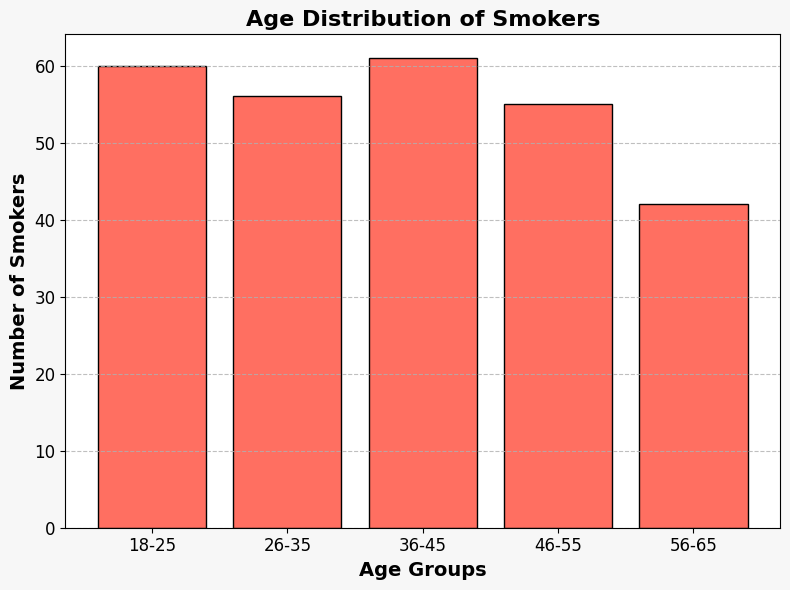

In [63]:
smokers = us_insurance_df[us_insurance_df['smoker'] == 'yes']

smokers['age_group'] = pd.cut(smokers['age'], bins=age_bins, labels=age_labels, right=False)

# Contando a quantidade de fumantes em cada faixa etária
age_group_counts = smokers['age_group'].value_counts(sort=False)

# Plotando o gráfico
plt.figure(figsize=(8, 6))
plt.bar(age_group_counts.index.astype(str), age_group_counts.values, color='#FF6F61', edgecolor='black')
plt.title('Age Distribution of Smokers', fontsize=16, fontweight='bold')
plt.xlabel('Age Groups', fontsize=14, fontweight='bold')
plt.ylabel('Number of Smokers', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().patch.set_facecolor('white')
plt.gcf().set_facecolor('#f7f7f7')
plt.tight_layout()
plt.show()

The age distribution of smokers in our dataset is generally well-balanced, with the exception of the age group 46-45 years. In this group, we observe a significant decrease in the number of smokers, while the 18-25 age group stands out as one of the largest. This is particularly interesting because, when examining the chart showing the variation in average charges across different age groups, we see that individuals in the 18-25 group pay the lowest charges, while those in the 56-65 group face the highest charges.

This observation suggests that young smokers (18-25 years old) might still be paying lower prices for their medical insurance due to their age and the assumption that they are less likely to require extensive healthcare in the short term, even though smoking increases their long-term health risks. On the other hand, older smokers (56-65 years old), who are fewer in number, face higher charges, likely due to the increased health risks associated with aging, as older individuals generally have higher healthcare needs.

#### How does avarage BMI vary across different age groups?

C:\Users\miria\AppData\Local\Temp\ipykernel_20352\2505472331.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_by_age = us_insurance_df.groupby('age_group')['bmi'].mean()


age_group
18-25    29.623397
26-35    30.226940
36-45    30.237292
46-55    31.359912
56-65    31.739329
Name: bmi, dtype: float64


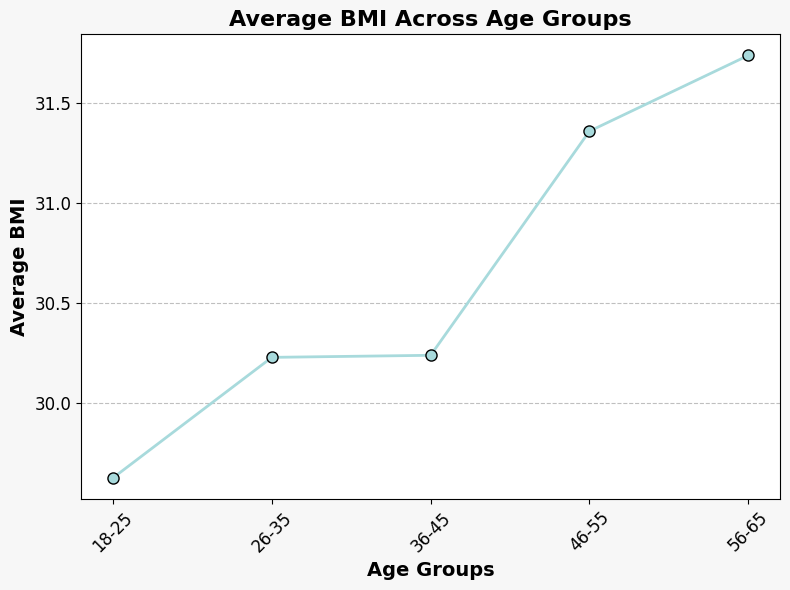

In [64]:
bmi_by_age = us_insurance_df.groupby('age_group')['bmi'].mean()

print(bmi_by_age)

plt.figure(figsize=(8, 6))
plt.plot(bmi_by_age.index, bmi_by_age.values, marker='o', color='#a8dadc', linestyle='-', linewidth=2, markersize=8, markeredgecolor='black')
plt.title('Average BMI Across Age Groups', fontsize=16, fontweight='bold')
plt.xlabel('Age Groups', fontsize=14, fontweight='bold')
plt.ylabel('Average BMI', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().patch.set_facecolor('white')
plt.gcf().set_facecolor('#f7f7f7')
plt.tight_layout()
plt.show()

The average BMI across age groups shows the largest rate of change between the 36-45 and 46-55 age groups. This indicates that the average BMI increases more rapidly as people move from the 36-45 age range to the 46-55 range, compared to the relatively constant BMI observed between the 26-35 and 36-45 groups. Additionally, individuals between the ages of 46-55 and 56-65 have the highest average BMIs, which likely contributes to their higher medical insurance costs.

#### How does BMI vary among smokers?

In [66]:
bmi_by_smoker = us_insurance_df.groupby('smoker')['bmi'].mean()

print(bmi_by_smoker)


smoker
no     30.651795
yes    30.708449
Name: bmi, dtype: float64


The averages are very close to each other, and the difference is not statistically significant.

## Conclusion

This project aimed to analyze medical insurance costs in the U.S. based on various demographic and behavioral characteristics, including age, sex, BMI, number of dependents, smoking habits, and region. Below are the key insights obtained:

* Age and Costs:
** There is a positive relationship between age and medical insurance costs. As individuals grow older, they tend to pay higher premiums, likely due to the increased risk of health problems with age.

* Smoking Habits:
** Smoking habits showed the greatest impact on medical insurance costs. Smokers certainly pay significantly more than non-smokers, suggesting that insurance companies consider smoking a high-risk factor for health.

* BMI and Health:
** Individuals with a high BMI also tend to face higher costs. However, the impact of BMI was not as significant as that of smoking habits.

* Region:
** When analyzing the regions (north, south, east, and west), no significant impact on insurance costs was observed. This indicates that the prices charged are likely influenced more by individual factors than by geographic location.

* Gender:
** No clear difference was observed in insurance costs between men and women, suggesting that gender is not a determining factor in pricing.

#### Final Considerations
The results of this analysis can be valuable for insurance companies in adjusting their pricing policies and for individuals seeking to understand the factors that most influence their insurance costs. Behavioral factors, particularly smoking, proved to be much more significant than demographic characteristics, such as gender or region.

To deepen the analysis, future investigations could include:

* Additional data, such as medical history or dietary habits.
* Predictive modeling to forecast costs based on individual characteristics.